In [12]:
# 라벨링

import pandas as pd
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('AFSNT_weather_7.csv', encoding='euc-kr')

# encode class values as integers
encoder = LabelEncoder()

encoder.fit(data['FLO'])
data['FLO'] = encoder.transform(data['FLO'])
encoder.fit(data['FLT'])
data['FLT'] = encoder.transform(data['FLT'])
encoder.fit(data['SDT_DY'])
data['SDT_DY'] = encoder.transform(data['SDT_DY'])
encoder.fit(data['AOD'])
data['AOD'] = encoder.transform(data['AOD'])
encoder.fit(data['IRR'])
data['IRR'] = encoder.transform(data['IRR'])
encoder.fit(data['DLY'])
data['DLY'] = encoder.transform(data['DLY'])
#encoder.fit(data['REG'])
#data['REG'] = encoder.transform(data['REG'])
data.drop('REG', axis=1, inplace=True)
data.info()
# ----------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979450 entries, 0 to 979449
Data columns (total 23 columns):
SDT_MM         979450 non-null int64
SDT_DD         979450 non-null int64
SDT_DY         979450 non-null int32
ARP_N          979450 non-null int64
ODP_N          979450 non-null int64
FLO            979450 non-null int32
FLT            979450 non-null int32
AOD            979450 non-null int32
IRR            979450 non-null int32
STT            979450 non-null int64
ATT            979450 non-null int64
DLY            979450 non-null int32
STTATT         979450 non-null int64
기온(°C)         979450 non-null float64
강수량(mm)        979450 non-null float64
풍속(m/s)        979450 non-null float64
풍향(16방위)       979450 non-null int64
습도(%)          979450 non-null float64
현지기압(hPa)      979450 non-null float64
일조(hr)         979450 non-null float64
적설(cm)         979450 non-null float64
전운량(10분위)      979450 non-null int64
최저운고(100m )    979450 non-null int64
dtypes: float64(7), int3

In [18]:
# 학습

y= data['DLY']
X =data.drop('DLY', axis= 1)

from imblearn.over_sampling import ADASYN 
over_X, over_y = ADASYN().fit_resample(X, y)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=66)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


#-------------------------------------------


Accuracy on training set: 1.000
Accuracy on test set: 1.000
Accuracy on training set: 1.000
Accuracy on test set: 1.000


c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.parti

c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\win10-a287\pycharmprojects\airlinedelay\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.

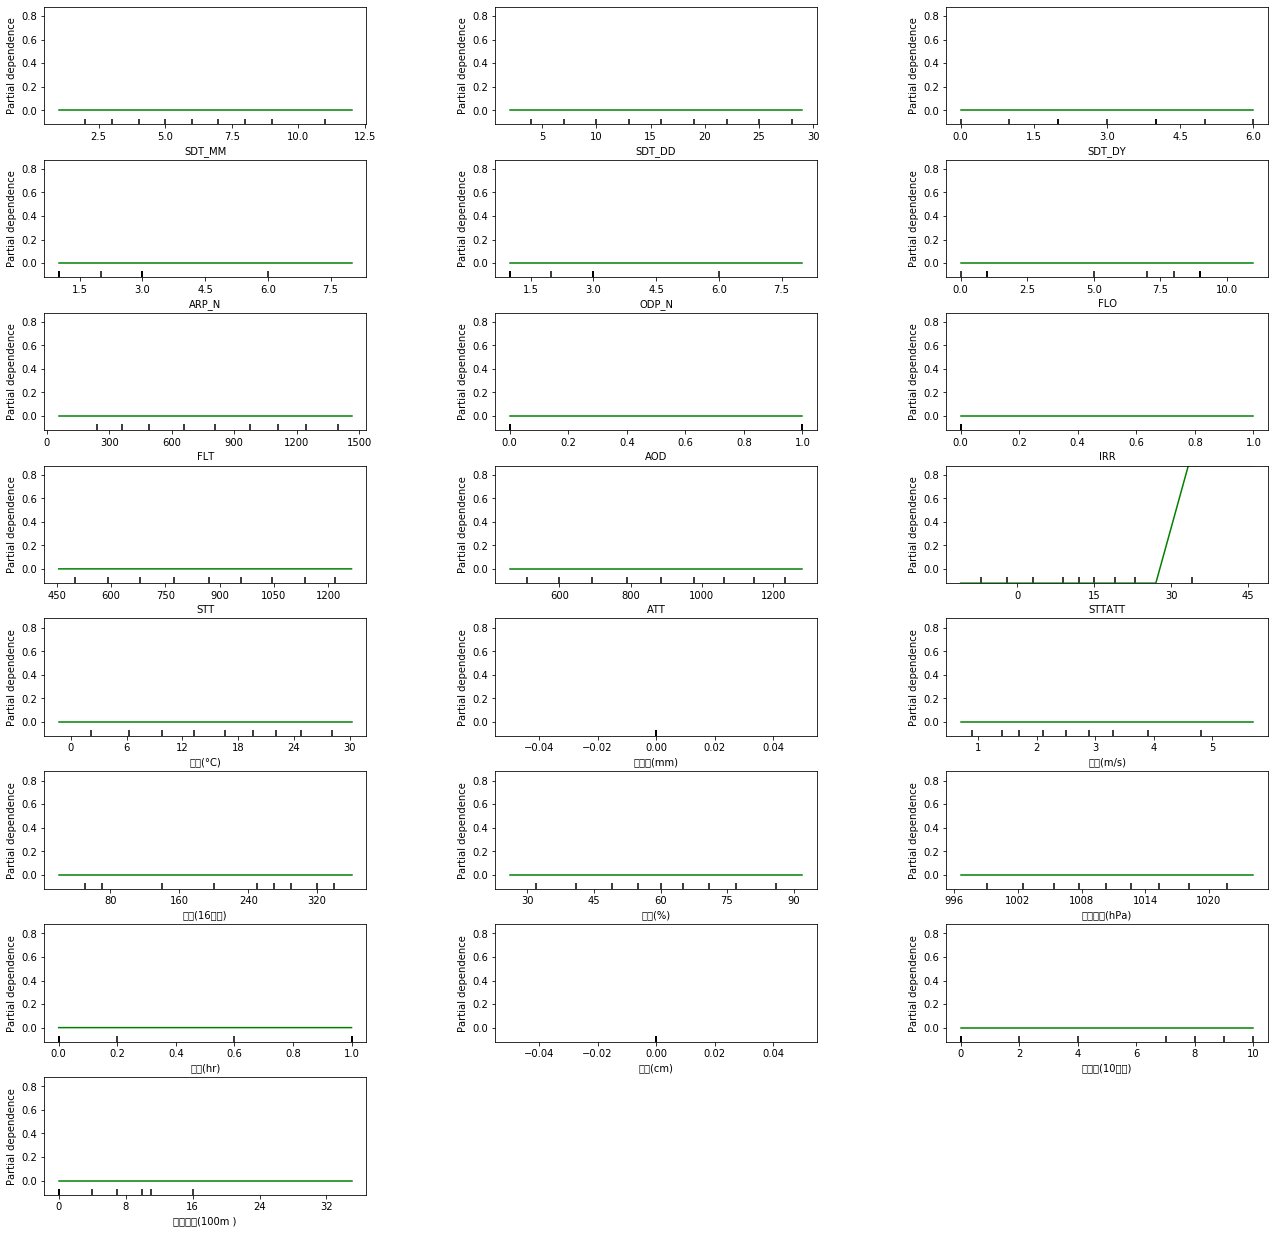

In [22]:

# PDP

# Partial Dependence Plots - adapted from Dan B NB on Kaggle()
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv, DataFrame
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np


from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

# get_some_data is defined in hidden cell above.
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot


plt.rcParams["figure.figsize"] = (20,30)
my_plots = plot_partial_dependence(my_model,
                                   features=[i for i in range(len(temp_x.columns.values.tolist()))],
                                   feature_names=temp_x.columns.values.tolist(), # column numbers of plots we want to show
                                   X=temp_x,            # raw predictors data.
                                   grid_resolution=10) # number of values to plot on x axis